In [7]:
input_map = []
with open("day-8-input.txt", 'r') as input_file:
    for line in input_file:
        line = line.strip()
        # print(line)
        line = list(map(int, line))
        input_map.append(line)
        # input()

In [2]:
import numpy as np
HEIGHT = len(input_map)
WIDTH = len(input_map[0])
visible_set = set()

In [3]:
for col in range(WIDTH):
    n = -1 # THRESHOLD
    for row in range(HEIGHT): # GOING DOWN THE MAP
        if input_map[row][col] > n:
            n = input_map[row][col]
            visible_set.add((row, col))
    
    n = -1 # THRESHOLD
    for row in range(HEIGHT-1, -1, -1): # GOING UP THE MAP
        if input_map[row][col] > n:
            n = input_map[row][col]
            visible_set.add((row, col))

for rr, row in enumerate(input_map):
    n = -1
    for col, h_tree in enumerate(row): # GOING LEFT TO RIGHT
        if h_tree > n:
            n = h_tree
            visible_set.add((rr, col))
    
    n = -1
    for col, h_tree in enumerate(row[::-1]): # GOING RIGHT TO LEFT
        if h_tree > n:
            n = h_tree
            visible_set.add((rr, WIDTH-col-1))
print(len(visible_set))

1560


ANS : 1560

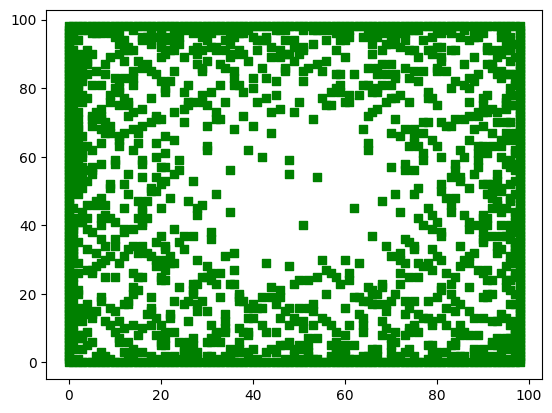

In [6]:
import matplotlib.pyplot as plt
for i, j in visible_set:
    plt.scatter(i,j,marker="s", color="green")

In [11]:
directions = [(0,1),(0,-1),(1,0),(-1,0)]
highestScore = 0
candidateTree = []
for x in range(1, WIDTH-1):
    for y in range(1, HEIGHT-1):
        t_height = input_map[y][x]
        scores = []
        for dx, dy in directions:
            dirScore = 0
            _x, _y = x,y
            while True:
                _x, _y = _x+dx, _y+dy
                if _x < 0 or _y < 0 or _x >= WIDTH or _y >= HEIGHT:
                    break
                dirScore += 1
                if input_map[_y][_x] >= t_height:
                    break
            scores.append(dirScore)
        A,B,C,D = scores
        _score = A*B*C*D
        if _score > highestScore:
            highestScore = _score
            bestTree = (x,y)
            candidateTree.append(bestTree)

print(bestTree)
print(highestScore)

(48, 7)
252000


Ans : 252000

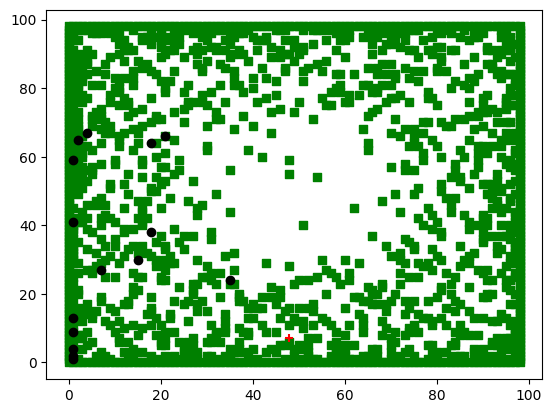

In [17]:
for i, j in visible_set:
    plt.scatter(i,j,marker="s", color="green")
for i,j in candidateTree:
    if (i,j) == bestTree:
        plt.scatter(i,j , marker="+", color="red")
        continue
    plt.scatter(i,j , marker="o", color = "black")
